In [1]:
import DirectDmTargets as dddm

calculating effective efficiency for Xe detector done
calculating effective efficiency for Ar detector done
calculating effective efficiency for Ge detector done


In [2]:
import corner

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import os

In [6]:
def load_chain(item='latest'):
    base = 'results/'
    save = 'test'
    files = os.listdir(base)
    if item is 'latest':
        item = max([int(f.split(save)[-1]) for f in files])
    result = {}
    load_dir = base + save + str(item) + '/'
    if not os.path.exists(load_dir):
        raise FileNotFoundError(f"Cannot find {load_dir} specified by arg: "
                                f"{item}")
    print("loading", load_dir)

    keys = ['config', 'full_chain', 'flat_chain']

    for key in keys:
        result[key] = np.load(load_dir + key + '.npy', allow_pickle=True)
    print(f"done loading\naccess result with:\n{keys}")
    return result

In [7]:
results = {}
for i in range(200):
    try:
        results[i] = dddm.load_chain(i)
        print()
    except FileNotFoundError:
        pass
#         print(f"No result for {i}")
#     print()

loading results/2nd_test0/
loading results/2nd_test1/
done loading
access result with:
['config', 'full_chain', 'flat_chain']

loading results/2nd_test2/
done loading
access result with:
['config', 'full_chain', 'flat_chain']

loading results/2nd_test3/
done loading
access result with:
['config', 'full_chain', 'flat_chain']

loading results/2nd_test31/
done loading
access result with:
['config', 'full_chain', 'flat_chain']

loading results/2nd_test32/
done loading
access result with:
['config', 'full_chain', 'flat_chain']

loading results/2nd_test34/
done loading
access result with:
['config', 'full_chain', 'flat_chain']

loading results/2nd_test35/
done loading
access result with:
['config', 'full_chain', 'flat_chain']

loading results/2nd_test37/
done loading
access result with:
['config', 'full_chain', 'flat_chain']

loading results/2nd_test38/
done loading
access result with:
['config', 'full_chain', 'flat_chain']

loading results/2nd_test39/
done loading
access result with:
['conf

In [8]:
results.keys()

dict_keys([1, 2, 3, 31, 32, 34, 35, 37, 38, 39, 40, 41, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 58, 59, 60, 61, 62, 63, 66, 67, 68, 69, 70, 71])

In [9]:
selected_keys = []
for i in results.keys():
    if '25prc' in results[i]['config'].item()['notes']:
#         print(i, ",")
        selected_keys.append(i)
selected_keys

[]

---1---


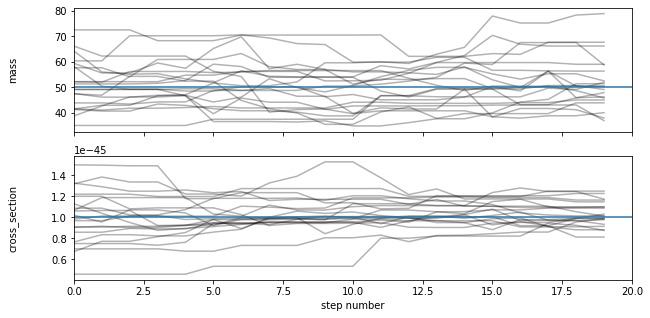

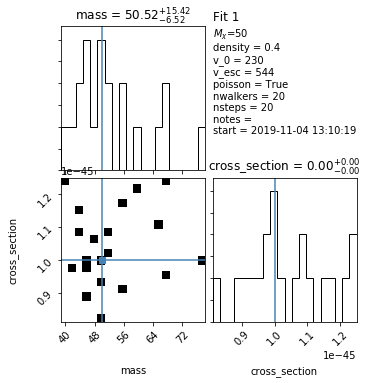

---2---


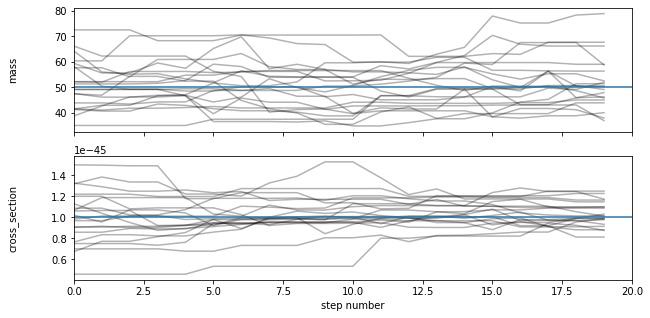

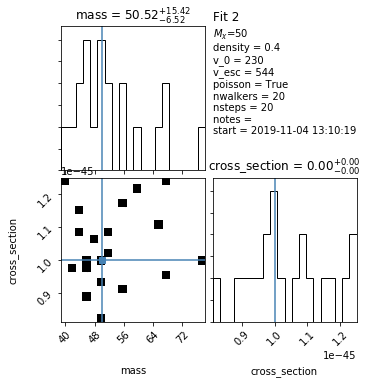

---3---


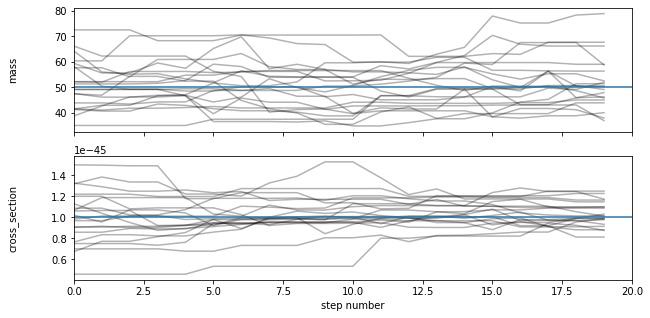

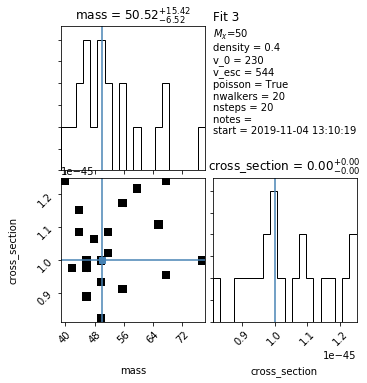

---31---


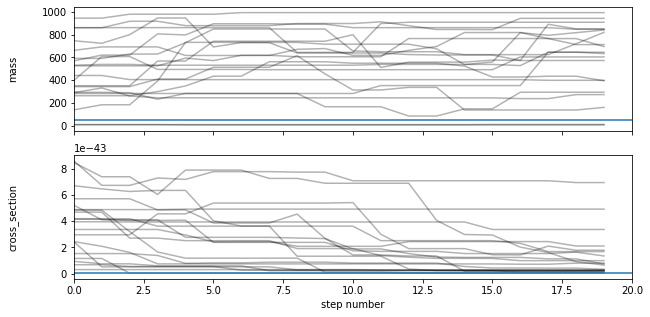

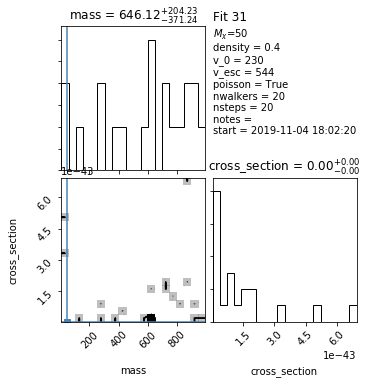

---32---


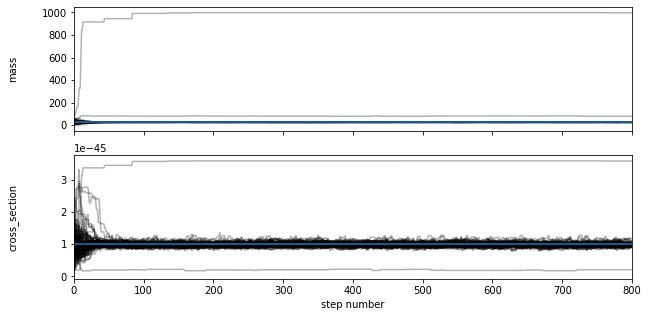

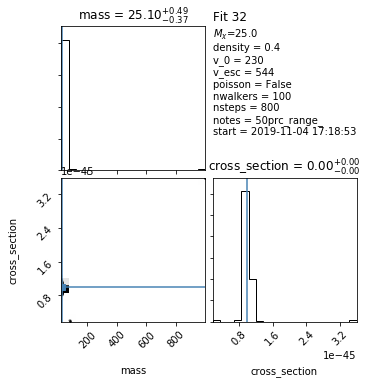

---34---


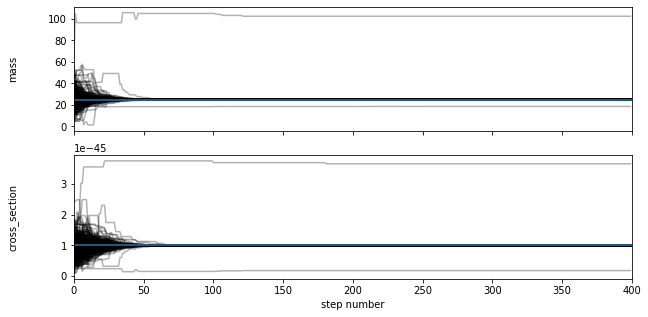

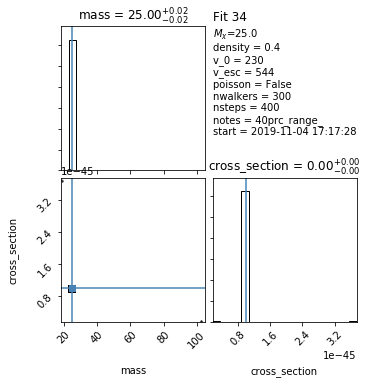

---35---


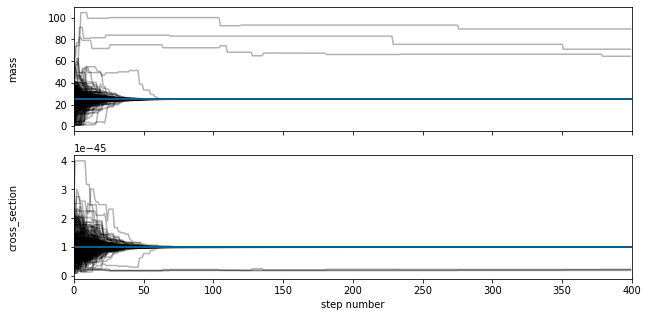

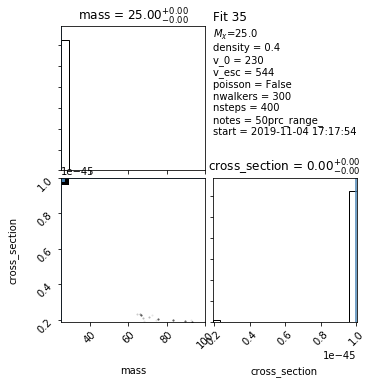

---37---


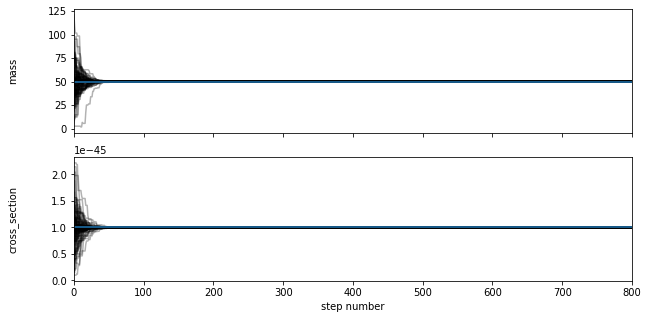

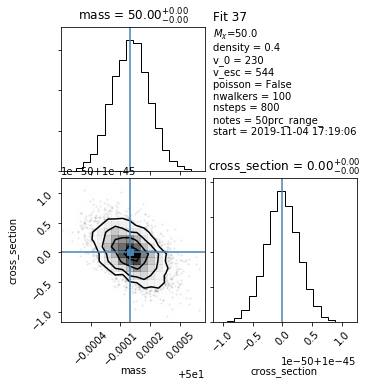

---38---


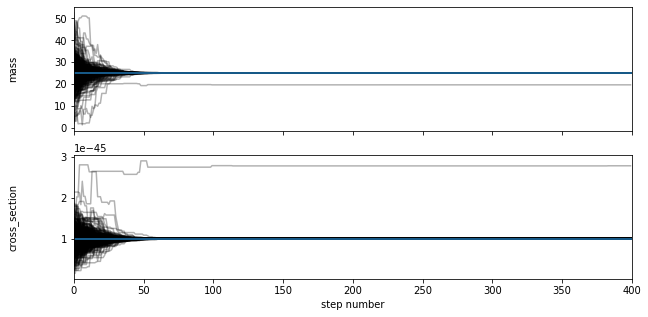

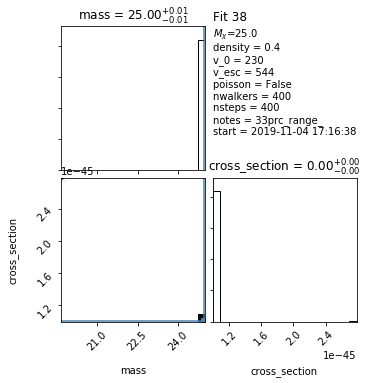

---39---


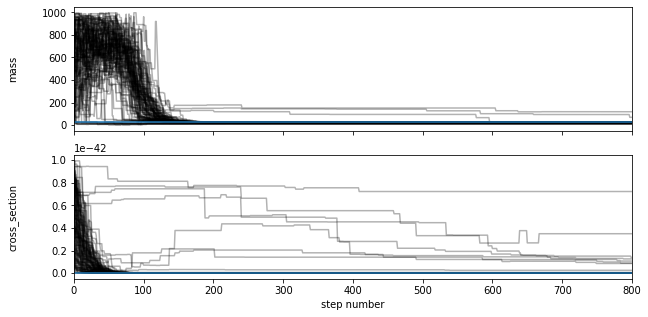

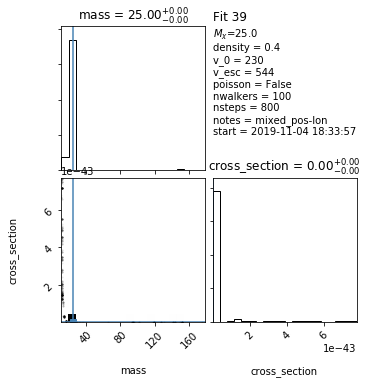

---40---


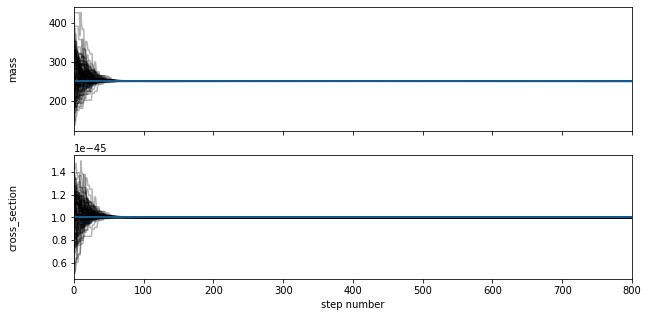

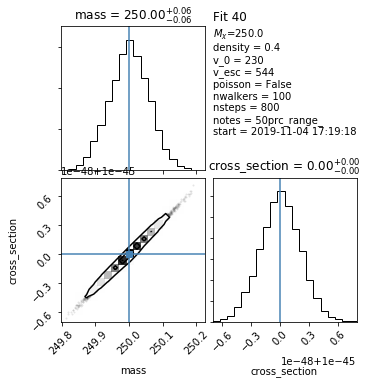

---41---


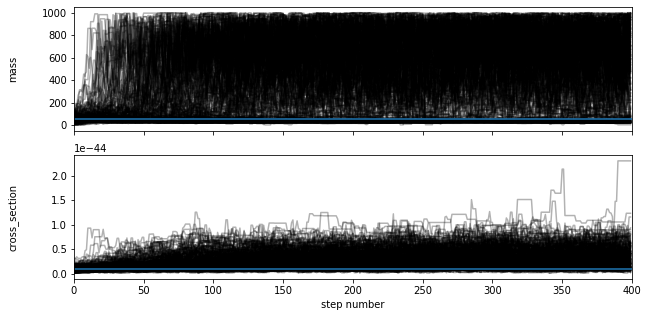

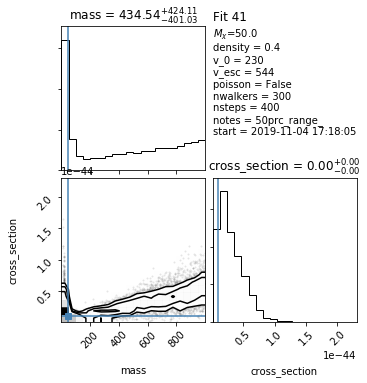

---44---


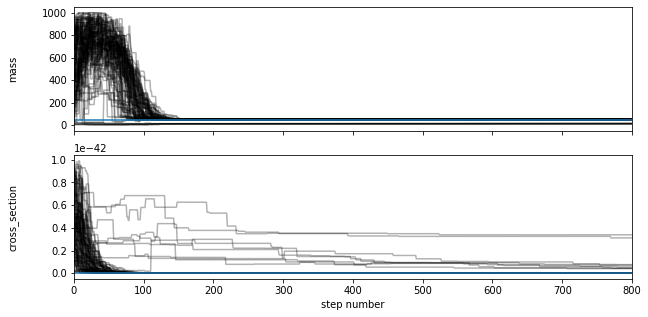

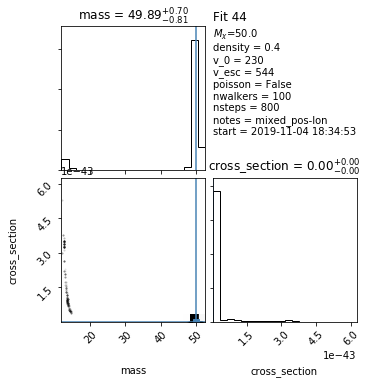

---45---


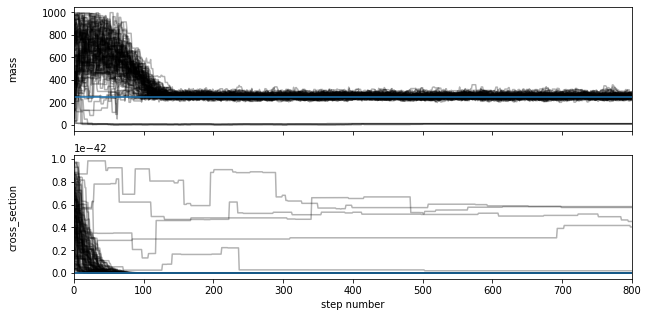

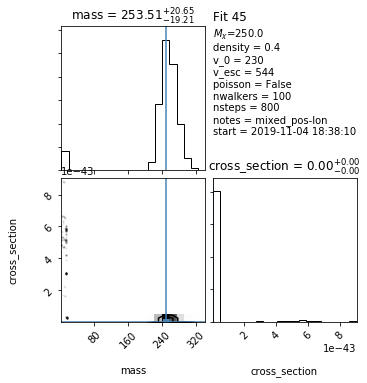

---46---


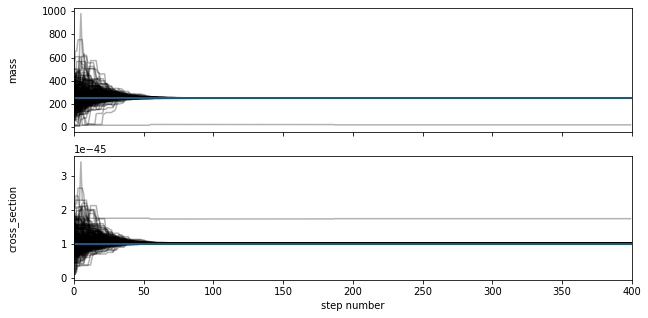

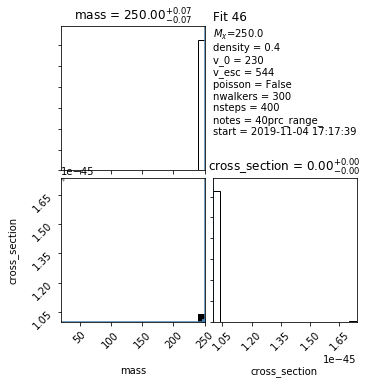

---47---


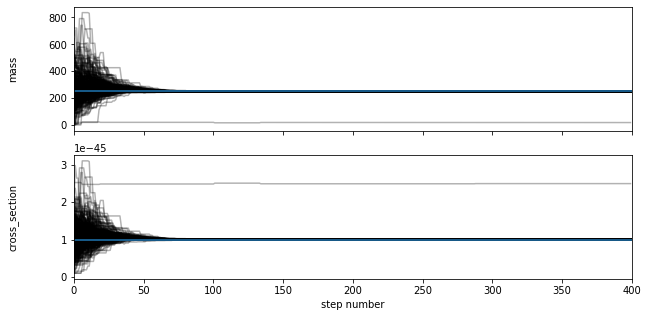

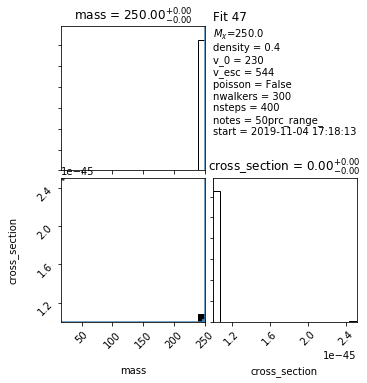

---48---


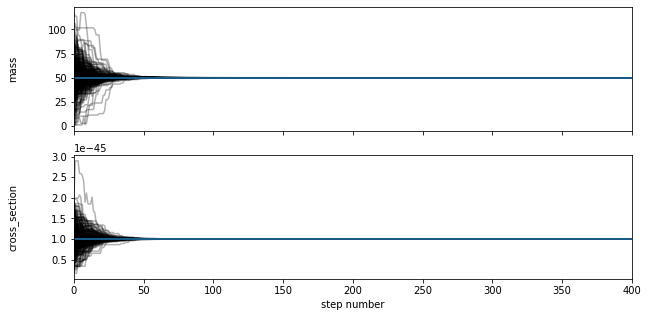

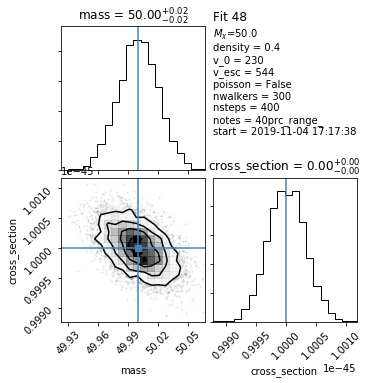

---49---


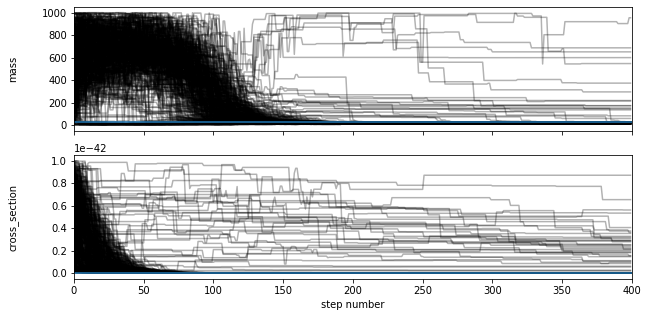

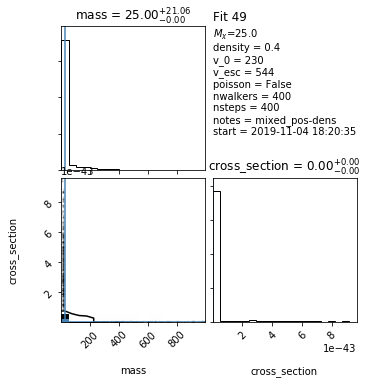

---50---


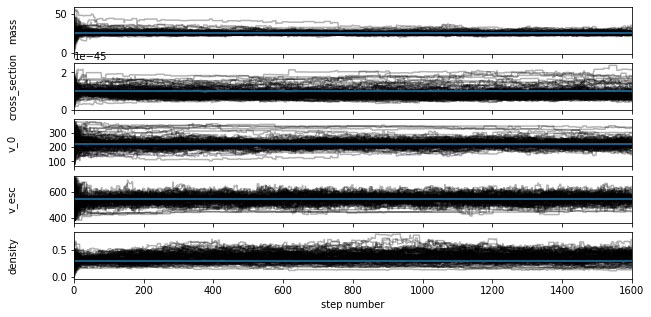

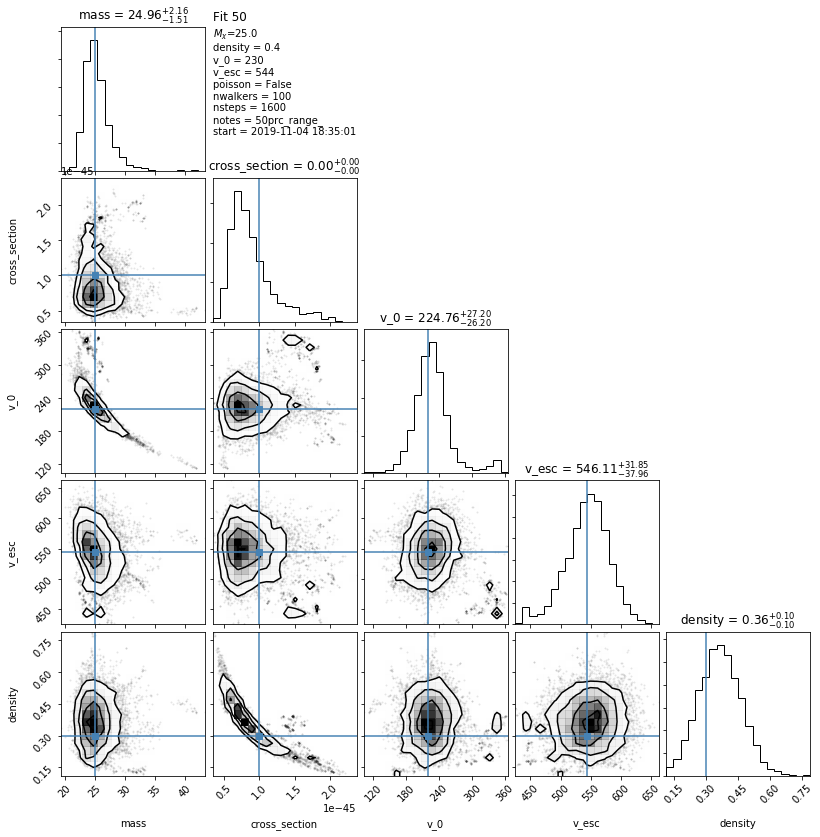

---52---


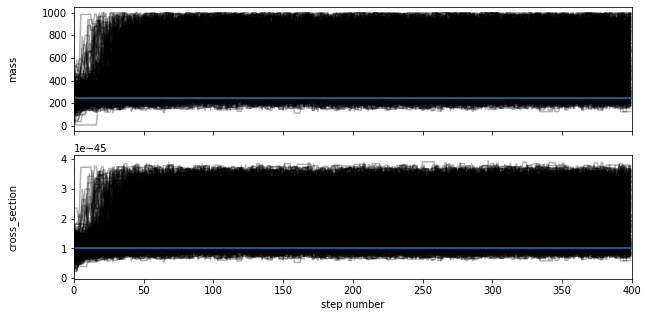

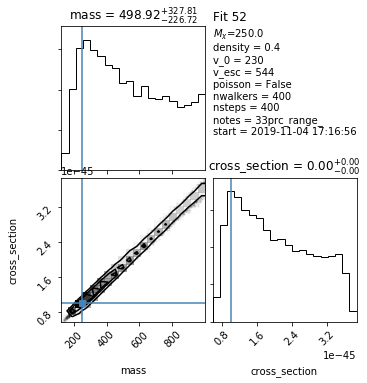

---53---


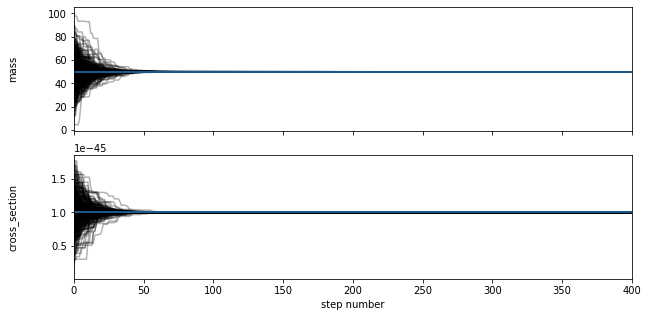

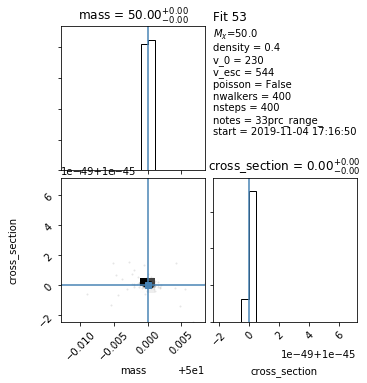

---54---


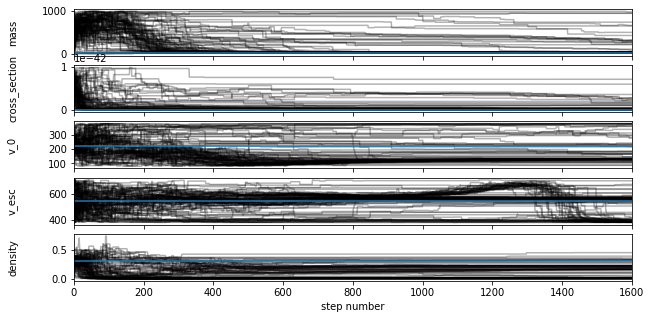

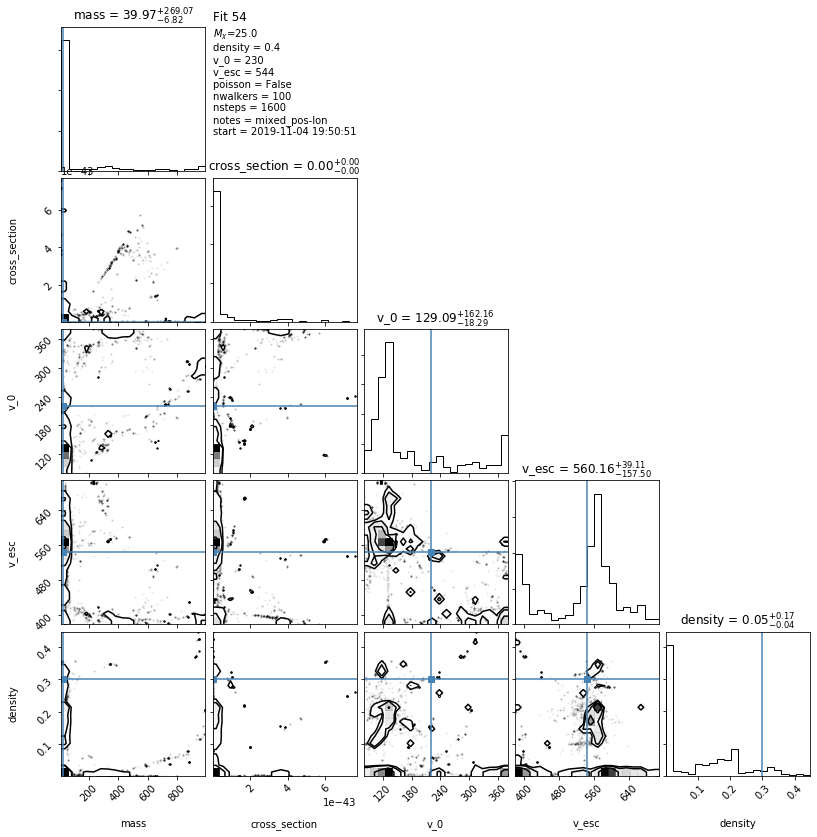

---55---


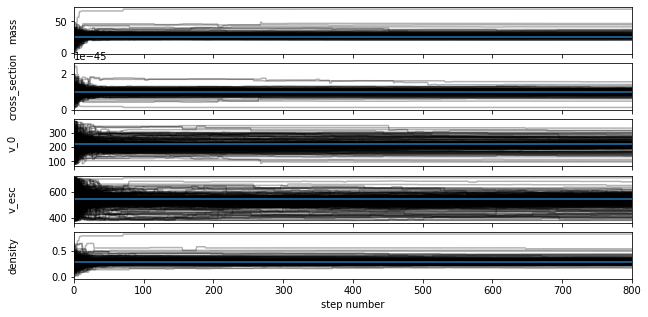

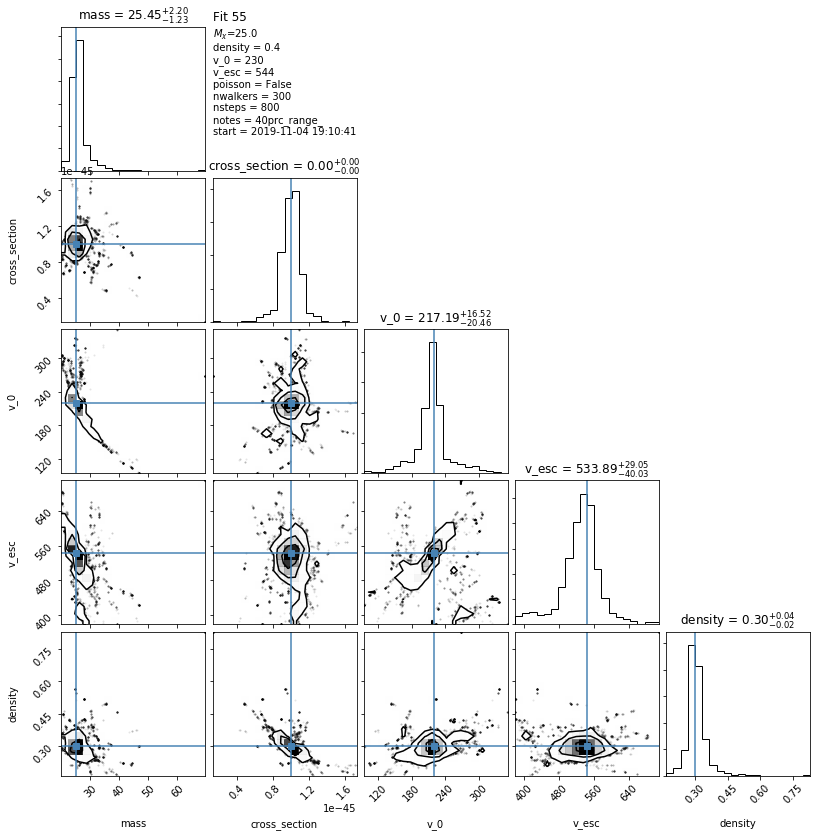

---58---


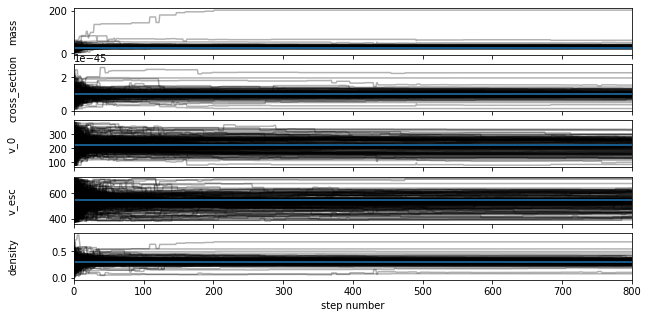

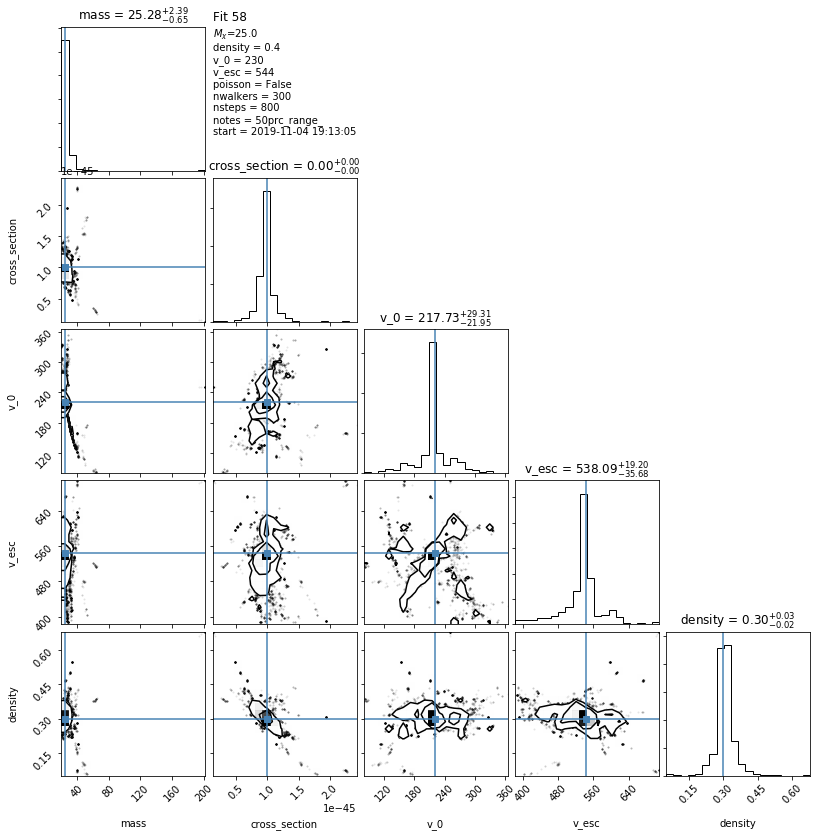

---59---


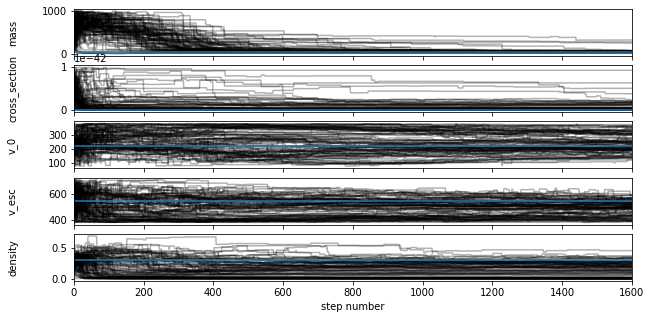

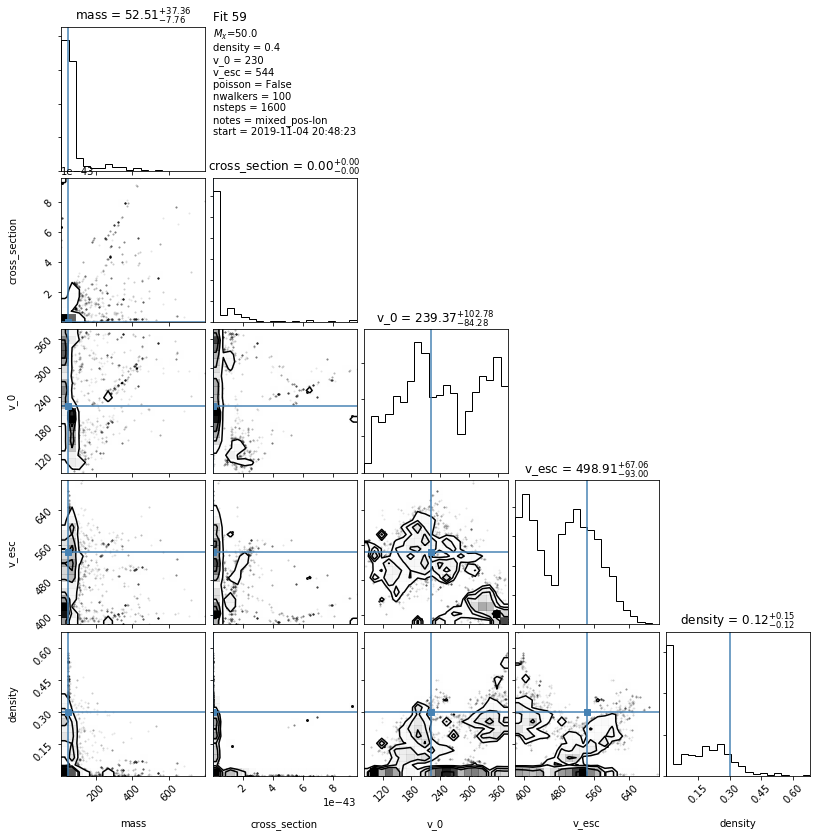

---60---


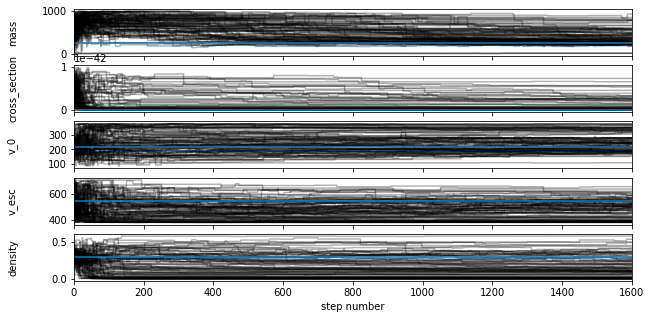

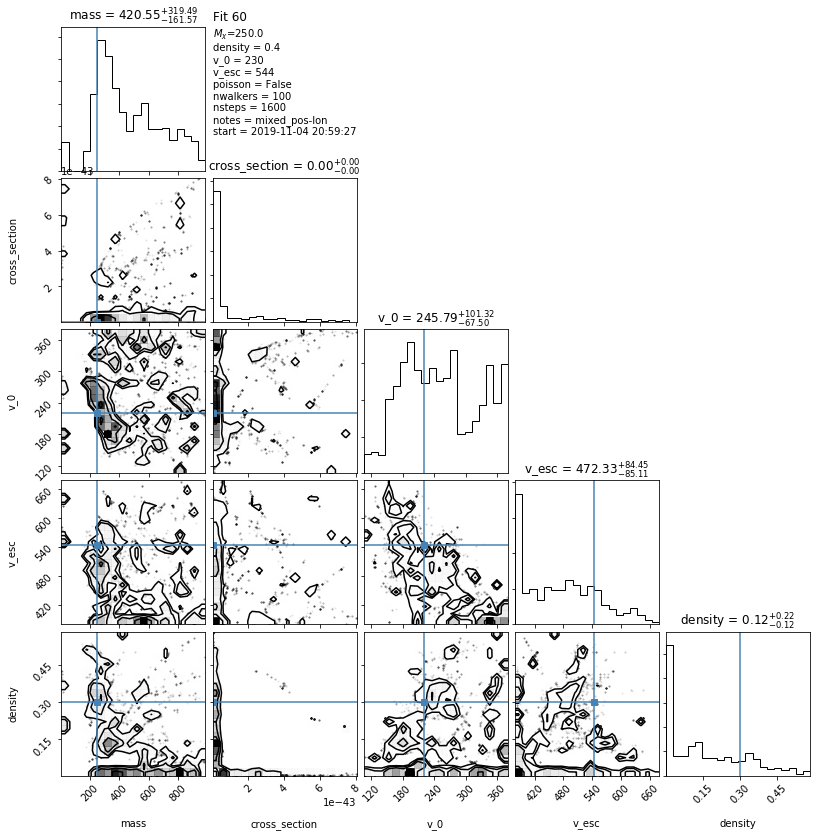

---61---


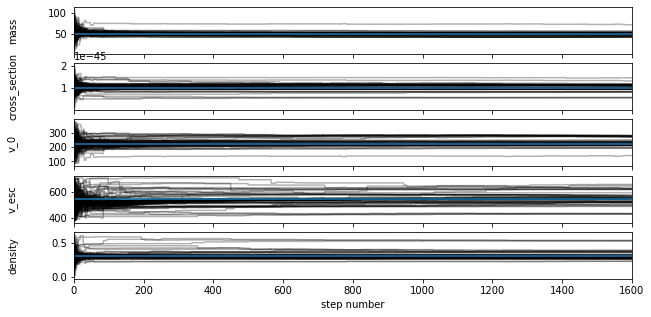

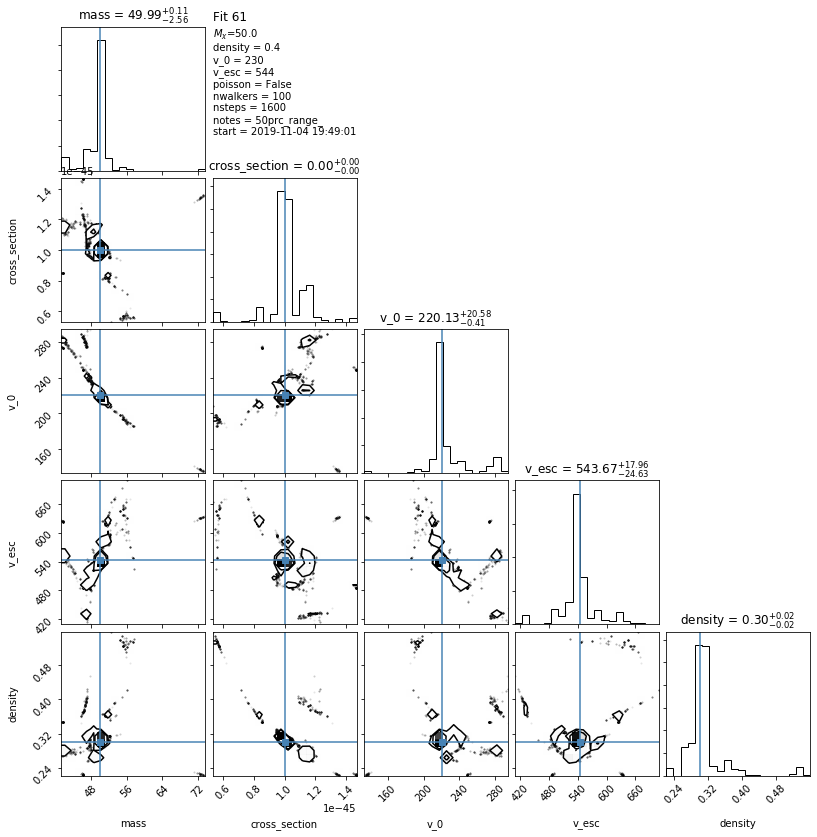

---62---


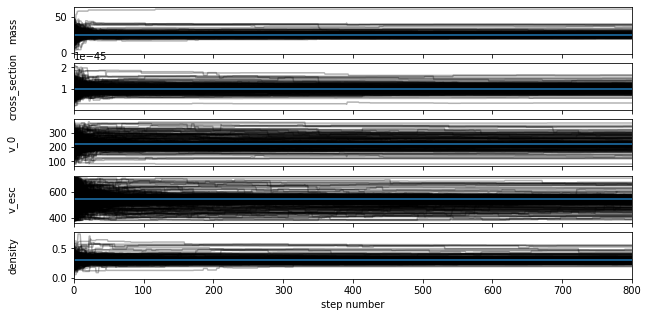

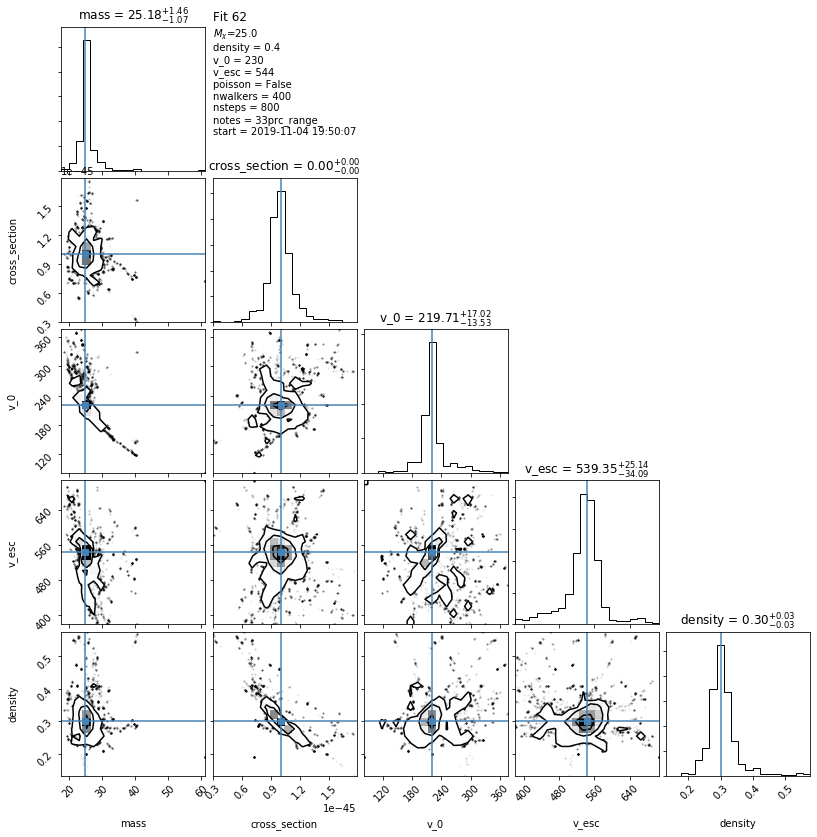

---63---


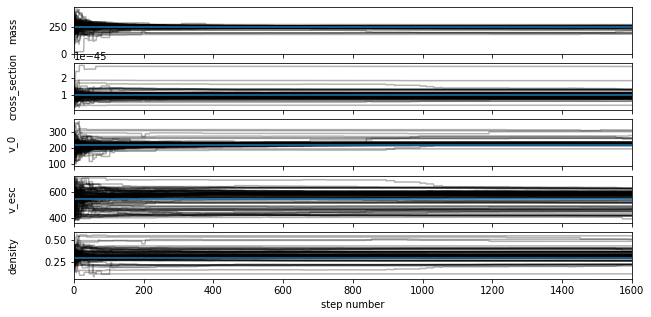

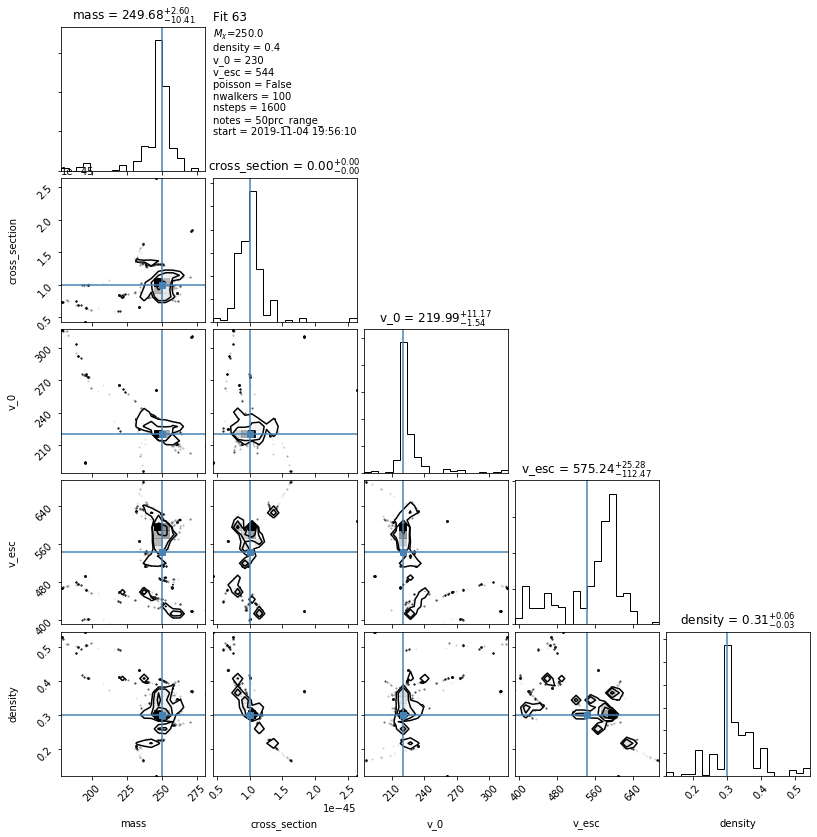

---66---


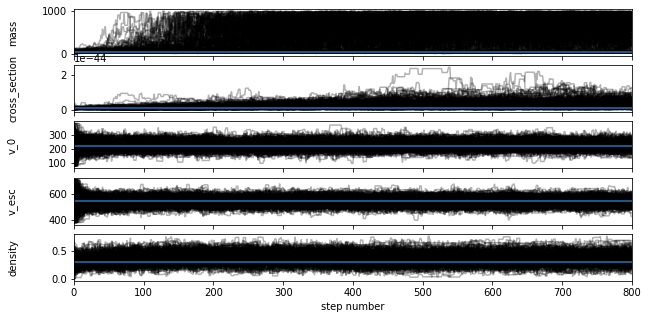

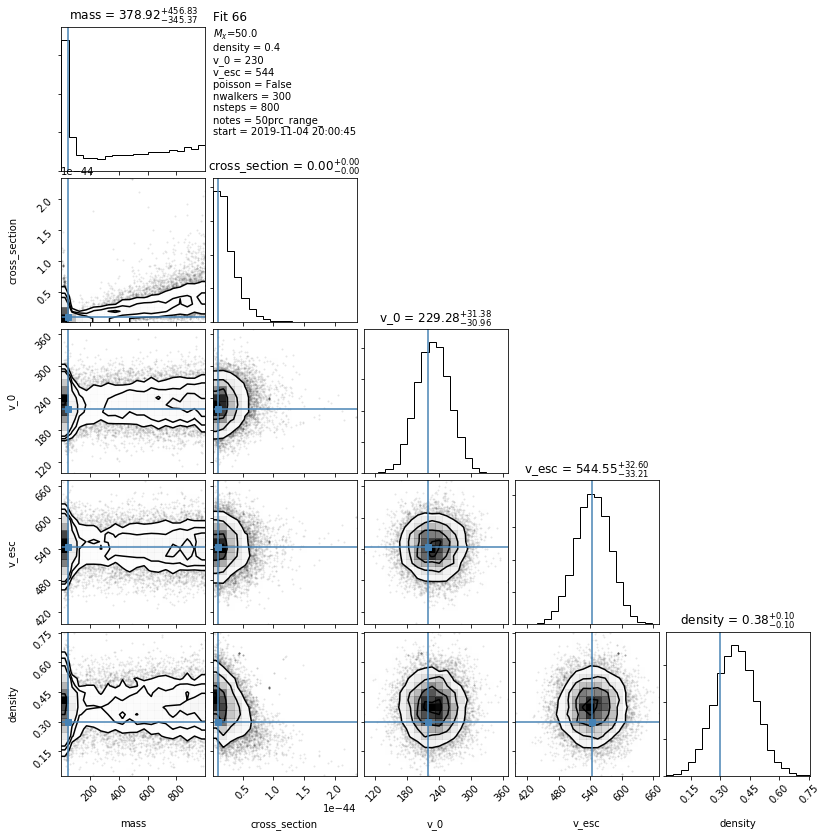

---67---


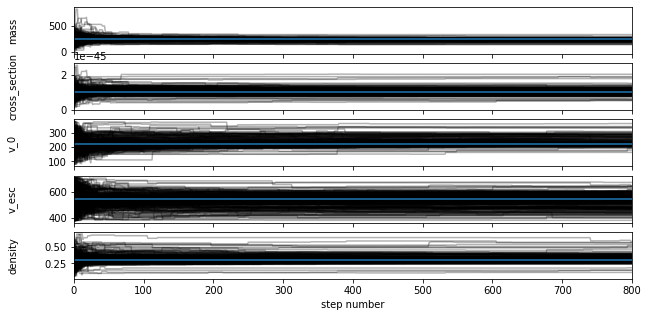

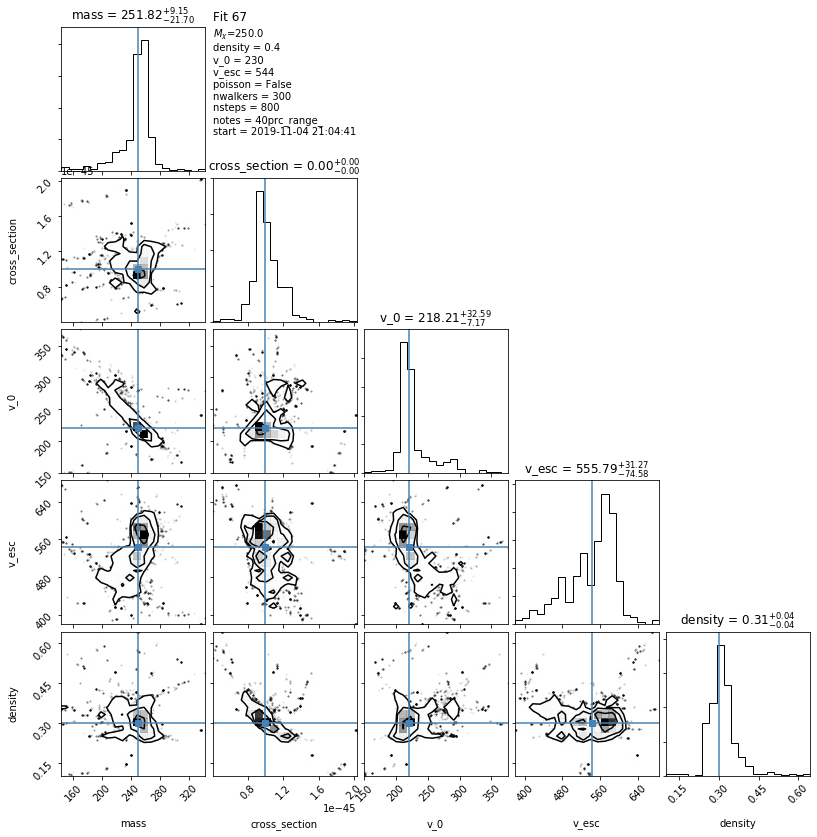

---68---


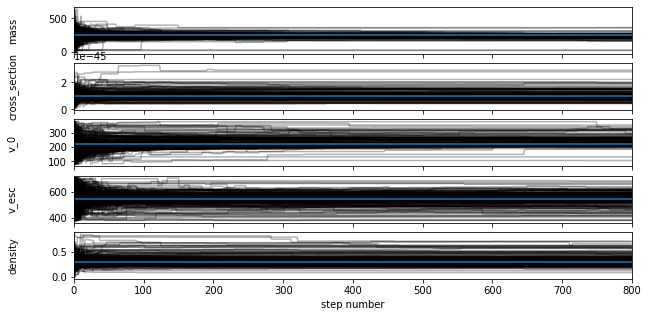

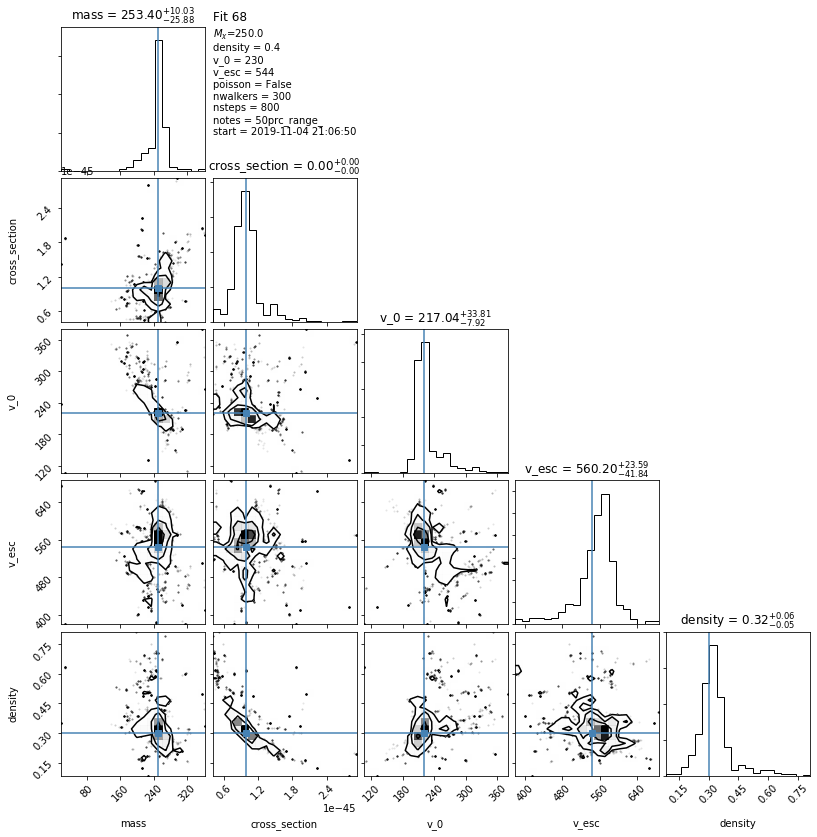

---69---


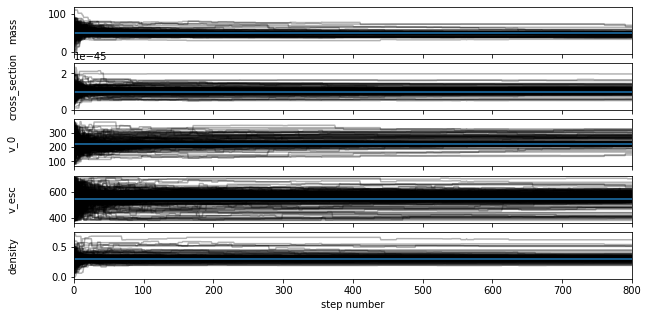

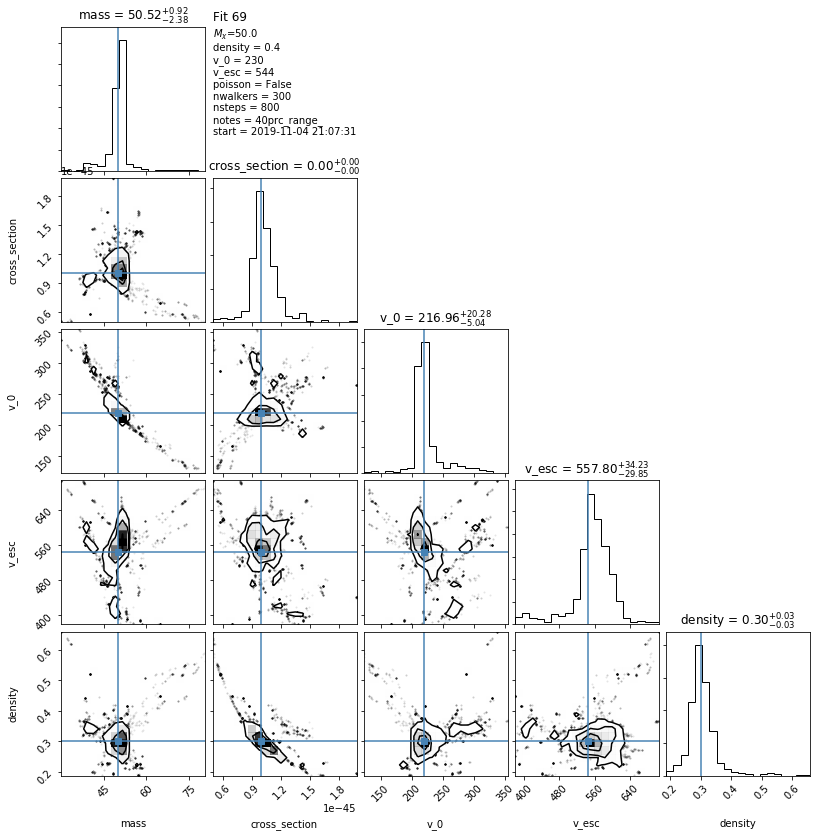

---70---


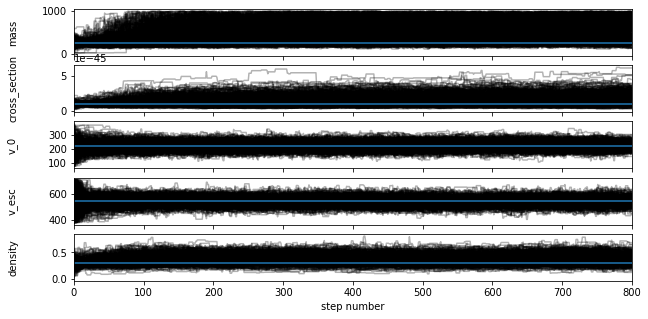

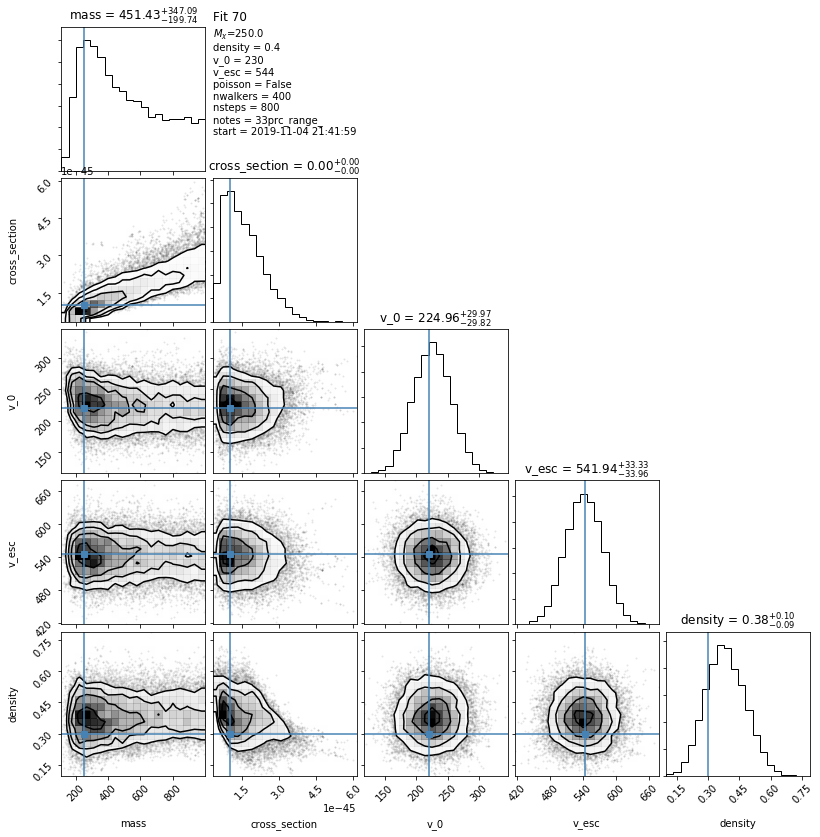

---71---


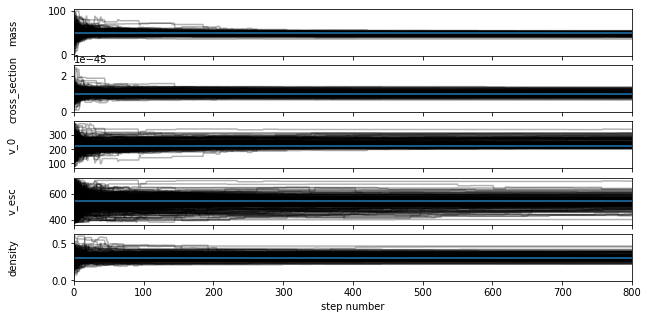

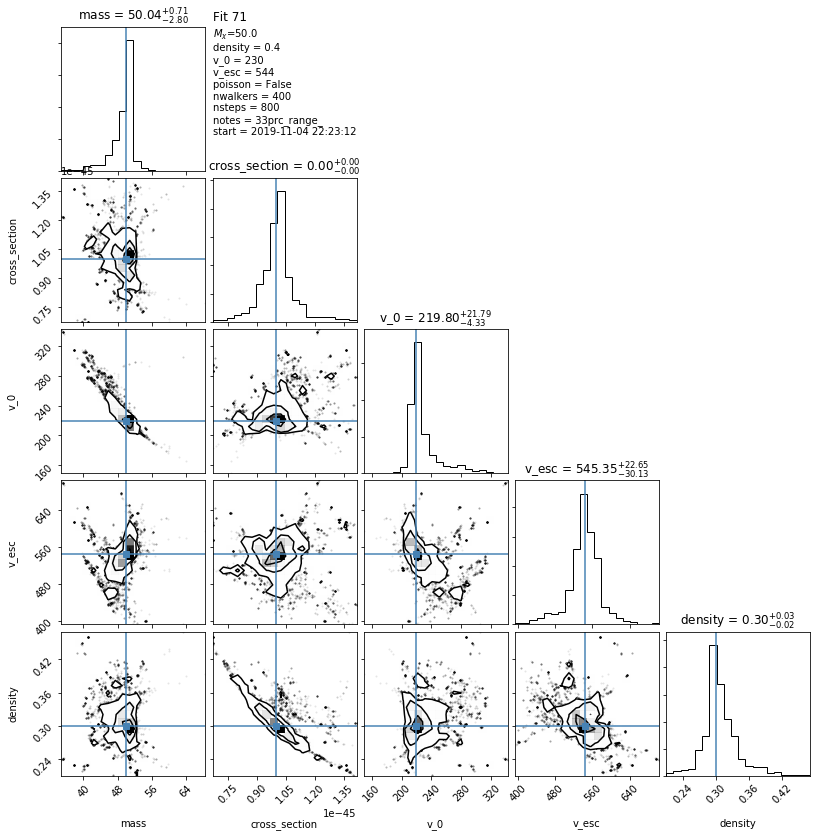

In [10]:
for key in results.keys():
# for key in selected_keys:
    print(f"---{key}---")
    result = results[key]
    try:       
        info = "$M_\chi}$=" + f"{result['config'].item()['mw']}"
        for prior_key in result['config'].item()['prior'].keys():
            try:
                mean = result['config'].item()['prior'][prior_key]['mean']
                info += f"\n{prior_key} = {mean}"
            except KeyError:
                pass
         
        nsteps, nwalkers, ndim = np.shape(result['full_chain'])
        
        info += "\npoisson = %s"%result['config'].item()['poisson']   
        info += "\nnwalkers = %s"%nwalkers
        info += "\nnsteps = %s"%nsteps
        for str_inf in ['notes', 'start']:
            try: 
                info += f"\n{str_inf} = %s"%result['config'].item()[str_inf][:-7]   
            except KeyError:
                pass
#         labels = ['log_mass',
#                         'log_cross_section',
#                         'v_0',
#                         'v_esc',
#                         'density'][:ndim]
        labels = ['mass',
                        'cross_section',
                        'v_0',
                        'v_esc',
                        'density'][:ndim]
        truths = [result['config'].item()['mw'],
                  result['config'].item()['sigma'],
                  result['config'].item()['v_0'],
                  result['config'].item()['v_esc'],
                  result['config'].item()['rho_0']
                  ][:ndim]
        
        fig, axes = plt.subplots(len(labels), figsize=(10, 5), sharex=True)
        samples = result['full_chain']
        for i in range(len(labels)):
            ax = axes[i]
            ax.plot(samples[:, :, i], "k", alpha=0.3)
            ax.axhline(truths[i])
            ax.set_xlim(0, len(samples))
            ax.set_ylabel(labels[i])
            ax.yaxis.set_label_coords(-0.1, 0.5)
            
        axes[-1].set_xlabel("step number")
        plt.savefig(f"results/2nd_test{key}/walkers{key}.png", dpi = 200)
        plt.show()
        
        fig= corner.corner(result['flat_chain'],
                            labels = labels,
                            truths = truths,
#                             quantiles=[0.05, 0.5, 0.95],
                           show_titles=True
                           );
#         fig.suptitle(f"Fit {key}\n\n\n")
        fig.axes[1].set_title(f"Fit {key}", loc = 'left')
        fig.axes[1].text(0,1,info, verticalalignment = 'top')
        plt.savefig(f"results/2nd_test{key}/corner{key}.png", dpi = 200)
        plt.show()
        
    except AssertionError:
        pass
    except ValueError:
        print(f"In one of the dimentions the walkers did not walk resulting in an empty range."
              f"This is not good, delete threse results. Info\n{info}")

In [11]:
# plt.hist2d(*chain.T, norm = LogNorm())

In [12]:
import multihist as mh

In [13]:
# np.shape(np.random.normal(1, 1, 10**6))

In [14]:
# Create and show a 2d histogram. Axis names are optional.
m2 = mh.Histdd(bins=100, range=[[1, 3], [-45.5, -44.5]], axis_names=['x', 'y'])
m2.add(*np.log10(results[18]['flat_chain'].T))
m2.add(*np.log10(results[23]['flat_chain'].T))
m2.add(*np.log10(results[24]['flat_chain'].T))
counts = m2.histogram
xbins, ybins = m2.bin_centers()
plt.contour(counts.transpose(),
            extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=3, cmap = plt.cm.rainbow, levels = [10])
plt.axvline(np.log10(25), c = 'r')
plt.axvline(np.log10(50), c = 'r')
plt.axvline(np.log10(250), c = 'r')
# m2.add(np.random.normal(-2, 1, 10**6), np.random.normal(2, 1, 10**6))
m2.plot(log_scale = True)
plt.show()

KeyError: 18

In [ ]:
np.shape(m2.histogram)

In [ ]:
# plt.contour(results[25]['flat_chain'].T[:2], (0.5, 0.5))

In [ ]:
test = [            np.clip(
                #                 val + 0.001 * val * np.random.randn(self.nwalkers, 1),
                val + 0.25 * val * np.random.randn(10, 1),
                #                 val + 0.5 * val * np.abs(
                #                     np.random.randn(self.nwalkers, 1)),
                1. * 1,
                1. * 4)
            for i, val in enumerate([0,1,3,4,5])]

In [ ]:
np.shape(test)

In [ ]:
stack_test = np.hstack(test)
np.shape(stack_test)

In [ ]:
np.shape(np.random.randn(10, 1))

In [ ]:
np.shape(
 np.random.uniform(0, 10, (10,1))
)

In [ ]:
mtest = mh.Histdd(bins=100, range=[[0, 10], [0, 4]], axis_names=['x', 'y'])
x, y = np.random.uniform(1,3,1000), np.random.uniform(1,3,1000)
mtest.add(x, y)
mtest.plot()

In [ ]:
mtest.histogram

In [ ]:
np.shape(mtest.bin_centers())

In [ ]:
counts = mtest.histogram
xbins, ybins = mtest.bin_centers()
plt.contour(counts.transpose(),
            extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=3, cmap = plt.cm.rainbow, levels = [95])